In [162]:
import numpy as np
import urllib
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle
import requests
import tensorflowjs as tfjs

In [163]:
#The classes we want to fetch
instruments = ["piano", "cello", "drums", "clarinet", "guitar", "trombone", "trumpet", "violin"]
number_of_classes = len(instruments)
'''
#The ground pathway to the url to get the classes
groundURL = "https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/"

print(number_of_classes)

for i in instruments:
  #print("https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/"+i+".npy")
  url = "https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/"+i+".npy"
  response = requests.get(url)
  print(response.status_code)
  save_path = os.path.join("python/data", i)+".npy"
  print(save_path)
  with open(save_path, 'wb') as file:
        file.write(response.content)

        '''


'\n#The ground pathway to the url to get the classes\ngroundURL = "https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/"\n\nprint(number_of_classes)\n\nfor i in instruments:\n  #print("https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/"+i+".npy")\n  url = "https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/"+i+".npy"\n  response = requests.get(url)\n  print(response.status_code)\n  save_path = os.path.join("python/data", i)+".npy"\n  print(save_path)\n  with open(save_path, \'wb\') as file:\n        file.write(response.content)\n\n        '

In [164]:

nmbr_of_samples = 10000; #How many images we want from the database per class
x_images = np.empty([0,784])
y_label = np.empty(0)

for i in instruments:
  path = os.path.join("data", i)+".npy"
  data = np.load(path)
  data = data[0:nmbr_of_samples]
  label = i

  x_images = np.concatenate((x_images,data),axis=0)
  y_label = np.append(y_label, [i]*nmbr_of_samples)

x_images, y_label = shuffle(x_images, y_label, random_state=42)

from sklearn.model_selection import train_test_split

#Reshape the images to 28x28 and then normalize them to 0-1 values
x_reshaped = np.reshape(x_images,(len(x_images),28,28,1))
x_images = x_reshaped.astype('float32')/255

#Split the data to 80-20 ratio of training- to test-sets
training_images, test_images, training_labels, test_labels = train_test_split(
    x_images, y_label, test_size=0.2, random_state=42, stratify=y_label)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 1, 1, 64)       │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 1, 1, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139,528 (545.03 KB)

 Trainable params: 138,952 (542.78 KB)

 Non-trainable params: 576 (2.25 KB)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.4516 - loss: 1.5005 - val_accuracy: 0.3887 - val_loss: 1.6215
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.6352 - loss: 0.9834 - val_accuracy: 0.6056 - val_loss: 1.1736
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6608 - loss: 0.8967 - val_accuracy: 0.6660 - val_loss: 0.8630
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6872 - loss: 0.8172 - val_accuracy: 0.6733 - val_loss: 0.8530
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7078 - loss: 0.7668 - val_accuracy: 0.6521 - val_loss: 0.9340
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7246 - loss: 0.7164 - val_accuracy: 0.6667 - val_loss: 0.8866
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.7352 - loss: 0.6815 - val_accuracy: 0.6706 - val_loss: 0.8973
150/150 - 0s - 3ms/step - accuracy: 0.6733 - loss: 0.8530
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

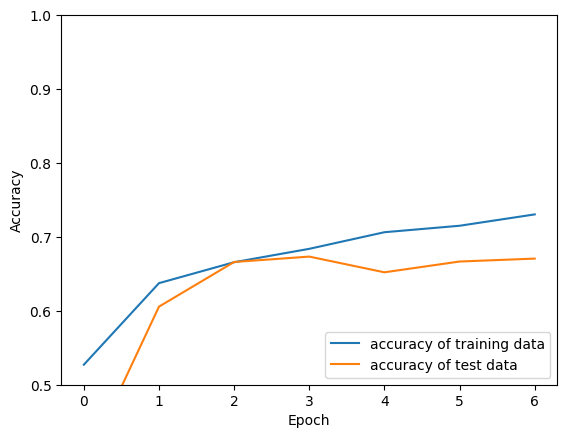

In [165]:

#Model
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())  # Added batch normalization
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())  # Added batch normalization
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (5, 5), activation='relu'))  # Added larger filter
model.add(layers.BatchNormalization())  # Added batch normalization

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))  # Added a dense layer
model.add(layers.BatchNormalization())  # Added batch normalization
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.3))  # Added dropout
model.add(layers.Dense(number_of_classes, activation="softmax"))  # Number of classes in the last layer
model.summary()

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

label_encoder = LabelEncoder()
training_labels_encoded = label_encoder.fit_transform(training_labels)
test_labels_encoded = label_encoder.transform(test_labels)
training_labels_one_hot = to_categorical(training_labels_encoded, num_classes=number_of_classes)
test_labels_one_hot = to_categorical(test_labels_encoded, num_classes=number_of_classes)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)  # Added early stopping
history = model.fit(training_images, training_labels_one_hot,
                    epochs=10, validation_data=(test_images, test_labels_one_hot),
                    callbacks=[early_stopping])

plt.plot(history.history['accuracy'], label='accuracy of training data')
plt.plot(history.history['val_accuracy'], label='accuracy of test data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels_one_hot, verbose=2)

predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)
correct_predictions = np.sum(predicted_classes == test_labels_encoded)
accuracy = correct_predictions / len(test_labels_encoded)
print(f"Manuell beräknad accuracy: {accuracy}")
print(tf.version.VERSION)


In [181]:

import random

for i in range(30):
  '''if(predicted_classes[i] != test_labels_encoded[i]):
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {label_encoder.inverse_transform([predicted_classes[i]])[0]}, Actual: {label_encoder.inverse_transform([test_labels_encoded[i]])[0]}")
    plt.show()'''

  '''idx = random.randint(0, len(test_images) - 1)
  plt.imshow(-test_images[idx].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted: {label_encoder.inverse_transform([predicted_classes[idx]])[0]}, Actual: {label_encoder.inverse_transform([test_labels_encoded[idx]])[0]}")
  plt.show()'''

model.save('NewSavedModel/model.keras')

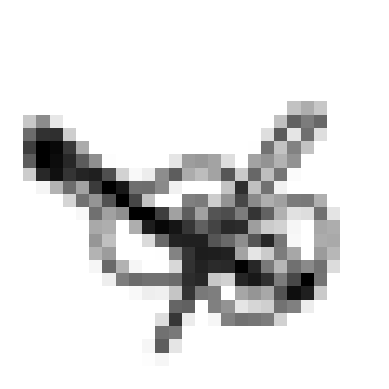

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
piano


In [6]:
from PIL import Image
import numpy as np
import keras
import matplotlib.pyplot as plt
import os

instruments = ["piano", "cello", "drums", "clarinet", "guitar", "trombone", "trumpet", "violin"]
loaded_model = keras.saving.load_model("NewSavedModel/model.keras")

# Load the image
image = Image.open("/Users/filipk/Downloads/import_img.png")
# Resize the image to 28x28
image_resized = image.resize((28, 28))
# Pick out the alpha channel to use
r, g, b, a = image_resized.split()
gray_array = np.array(a).flatten()
# Plot the image
plt.imshow(a,"gray_r")
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

# Invert the grayscale values
inverted_array = (255 - gray_array)
normalized_array = np.reshape(inverted_array,(28,28,1))/255

prediction_img = np.expand_dims(normalized_array,axis=0)

prediction = loaded_model.predict(prediction_img)
predicted_class = np.argmax(prediction, axis=1)
print(instruments[predicted_class[0]])

os.remove("/Users/filipk/Downloads/import_img.png")